In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix


In [3]:
# read data
df = pd.read_csv("median_phospho_data.csv")

# display(df.filter(regex="184A1", axis=0))
# display(df[df.cell_line== "184A1"])
# filter data and clean to prepare it for Support Vector Machine
df_copy = df
new_df = df[df["treatment"] == "full"]
types_df = pd.read_csv("subtypes.csv")
full_dataframe = new_df.set_index("cell_line").join(types_df.set_index("Cell line"))

luminal_cells = full_dataframe[full_dataframe["Type"] == "L"].fillna(0)
basal_cells = full_dataframe[full_dataframe["Type"] == "B"].fillna(0)
normal_cells = full_dataframe[full_dataframe["Type"] == "Normal"].fillna(0)
luminal_cell_names = luminal_cells.index
basal_cell_names = basal_cells.index
normal_cell_names = normal_cells.index
luminal_copy = luminal_cells
basal_copy = basal_cells
normal_copy = normal_cells
display(full_dataframe)
# set up data for training
drop_lst = ["treatment", "time", "cell_line", "Type", "ER", "PR", "HER2", "PI3K", "p53", "RAS"]
luminal_cells = luminal_cells.reset_index().drop(drop_lst, axis=1)
basal_cells = basal_cells.reset_index().drop(drop_lst,axis=1)
normal_cells = normal_cells.reset_index().drop(drop_lst, axis=1)

svm_data_bin = pd.concat([luminal_cells, basal_cells])

svm_data_bin = svm_data_bin.reset_index()
svm_data_bin = svm_data_bin.fillna(0)
svm_data_bin = svm_data_bin.drop("index", axis=1)

svm_labels_bin = list(np.zeros(len(luminal_cells))) + list(np.ones(len(basal_cells)))

luminal_centroid = luminal_cells.transpose().mean(axis=1)
basal_centroid = basal_cells.transpose().mean(axis=1)
normal_centroid = normal_cells.transpose().mean(axis=1)

all_labels = list(types_df["Cell line"])

full_sample_names = list(df[df["treatment"] == "full"]["cell_line"])

perturbs = df.treatment.unique()


,treatment,time,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,p.Akt.Ser473.,...,p.STAT1,p.STAT3,p.STAT5,Type,ER,PR,HER2,PI3K,p53,RAS
cell_line,,,,,,,,,,,,,,,,,,,,,
184A1,full,0.0,1.268450,3.011949,3.269844,2.971663,6.726300,3.876879,2.905013,3.089881,...,2.887623,1.565863,2.264294,Normal,NaN,NaN,NaN,NaN,NaN,NaN
184B5,full,0.0,0.644142,2.724148,1.992426,2.214774,6.145829,2.379644,2.210643,2.981967,...,2.412290,1.562300,2.227544,Normal,NaN,NaN,NaN,NaN,NaN,NaN
AU565,full,0.0,0.677910,1.779176,1.673790,1.759997,6.159892,3.368162,2.533022,NaN,...,2.551210,1.107368,2.433133,L,NaN,NaN,NaN,NaN,TP53_R175H,NaN
BT20,full,0.0,0.981176,2.298729,2.604696,2.357667,6.357916,3.449260,2.922381,4.431486,...,3.184696,2.611055,3.028543,B,neg,neg,neg,PIK3CA_P539R,TP53_K132Q,?
BT474,full,0.0,1.063666,2.434756,1.759334,3.102078,6.121343,2.168054,2.905236,4.173112,...,3.278507,1.167880,2.727995,L,pos,pos,pos,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UACC812,full,0.0,0.447033,1.912245,1.910090,2.156748,6.249708,2.524488,1.937317,2.966196,...,2.245525,2.340043,2.797592,L,pos,pos/neg,pos,NaN,NaN,NaN
UACC893,full,0.0,0.796624,1.779636,2.283681,2.579910,6.439663,3.187646,3.442570,3.084190,...,2.014526,0.790651,1.892180,L,neg,neg,pos,NaN,NaN,NaN
ZR751,full,0.0,0.521518,1.595210,2.320011,2.379614,6.058985,3.423700,2.676131,2.903183,...,2.577450,2.221809,2.953896,L,pos,pos/neg,neg,NaN,NaN,NaN


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


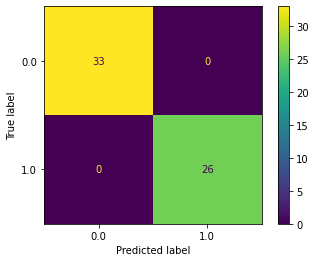

In [4]:
# train Support Vector Machine
from sklearn import svm
from sklearn.svm import SVC
svc = SVC(kernel="linear", C=100)
svc.fit(svm_data_bin, svm_labels_bin)
plot_confusion_matrix(svc,svm_data_bin,svm_labels_bin)

In [5]:
# Calculate State Transition Vector and Normal to Hyperplane
from scipy import linalg
from math import degrees
hyperplane_normal_lb = svc.coef_[0]/linalg.norm(svc.coef_[0])
# distance between luminal and basal centroids (cSTAR eq. 1) -> STV
state_vec_lb = (basal_centroid - luminal_centroid)/linalg.norm(luminal_centroid - basal_centroid)
norm_stv_df = pd.DataFrame(state_vec_lb,index=svm_data_bin.columns,columns=['STV_LB'])
norm_stv_df.insert(0,'Norm_LB', hyperplane_normal_lb)
norm_stv_df.sort_values(by='Norm_LB').to_csv('STV_Luminal_Basal.csv')

norm_stv_df

,Norm_LB,STV_LB
b.CATENIN,0.046884,0.006244
cleavedCas,-0.019825,-0.001486
CyclinB,0.119155,0.240307
GAPDH,0.057626,0.098543
IdU,0.214310,0.255112
Ki.67,0.239274,0.321323
p.4EBP1,-0.042644,-0.052987
p.Akt.Ser473.,-0.057787,0.234242
p.AKT.Thr308.,0.241457,-0.010454
p.AMPK,-0.060952,0.148380


In [6]:

df = df.reset_index()
df["cell_line"] += "_" + df["time"].astype(str) + "_" + df["treatment"]
df = df.set_index("cell_line")
df = df.fillna(0)
types_df = types_df.set_index("Cell line")
# types_df

In [7]:
import statistics
# make intercept negative since we wish to get it on "the other side"
H_CONST_LB = - svc.intercept_[0]/linalg.norm(svc.coef_[0])
n = norm_stv_df['Norm_LB']
s = norm_stv_df["STV_LB"]

df = df.drop(["index", "treatment", "time"], axis=1)

def extract_cell_line(sample):
    return sample[:sample.index("_")]

def calculate_dpd(row,dataframe, h, s_vec, n_vec):
    smpl = row.name
    DPD_val = - (h - np.dot(dataframe.loc[smpl],n_vec))/np.dot(n_vec,s_vec)
    return DPD_val

df["Specific DPD"] = df.apply(calculate_dpd,args=(df, H_CONST_LB, s,n), axis=1)
df["Group"] = df.apply(lambda row: row.name[0:row.name.find("_")], axis=1)

def avg_dpd(row):
    return np.mean(df[df["Group"] == row.name]["Specific DPD"])


types_df['DPD'] = types_df.apply(avg_dpd, axis=1)
display(types_df)
types_df.to_csv('cell_line_and_subtype_test.csv')

,Type,ER,PR,HER2,PI3K,p53,RAS,DPD
Cell line,,,,,,,,
184A1,Normal,NaN,NaN,NaN,NaN,NaN,NaN,0.255821
184B5,Normal,NaN,NaN,NaN,NaN,NaN,NaN,-0.520846
AU565,L,NaN,NaN,NaN,NaN,TP53_R175H,NaN,-1.657519
BT20,B,neg,neg,neg,PIK3CA_P539R,TP53_K132Q,?,0.483621
BT474,L,pos,pos,pos,NaN,NaN,NaN,-0.830863
...,...,...,...,...,...,...,...,...
UACC812,L,pos,pos/neg,pos,NaN,NaN,NaN,-1.337481
UACC893,L,neg,neg,pos,NaN,NaN,NaN,-1.965336
ZR751,L,pos,pos/neg,neg,NaN,NaN,NaN,-0.877516


In [8]:
# import matplotlib.pyplot as plt

# binary_dpd_vals = types_df["DPD"]


# fig = plt.figure(figsize=(12,7))
# ax = fig.add_subplot(111)

# fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
# fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
# fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
# fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
# plt.rc('font', **fontAxes)

# # making ticks readable
# plt.xticks(rotation='vertical')

# ax.plot(binary_dpd_vals.loc[luminal_cell_names],'^',color='blue',label='luminal',ms=8)
# ax.plot(binary_dpd_vals.loc[basal_cell_names],'^',color='red',label='basal',ms=8)
# ax.plot(binary_dpd_vals.loc[normal_cell_names],'^',color='green',label='normal',ms=8)

# plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


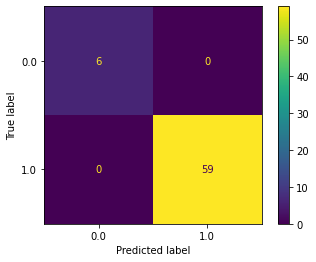

In [9]:
svc_canc = SVC(kernel='linear',C=100)
svc_canc.fit(pd.concat([luminal_cells,basal_cells,normal_cells]).fillna(0), list(np.ones(len(luminal_cells))) + list(np.ones(len(basal_cells))) + list(np.zeros(len(normal_cells))))
# b_coeff_canc = svc_canc.intercept_[0]/linalg.norm(svc_canc.coef_[0])
hyperplane_normal_canc = svc_canc.coef_[0]/linalg.norm(svc_canc.coef_[0])
canc_centroid = (basal_centroid + luminal_centroid)/2
state_vec_canc = pd.DataFrame((canc_centroid - normal_centroid)/linalg.norm(canc_centroid - normal_centroid), columns=["STV_Canc"])
plot_confusion_matrix(svc_canc,pd.concat([luminal_cells,basal_cells,normal_cells]).fillna(0), list(np.ones(len(luminal_cells))) + list(np.ones(len(basal_cells))) + list(np.zeros(len(normal_cells))))

In [10]:
composite_vec = pd.concat([norm_stv_df, state_vec_canc], axis=1)
composite_vec.insert(2, "Norm_Canc", hyperplane_normal_canc)
composite_vec

,Norm_LB,STV_LB,Norm_Canc,STV_Canc
b.CATENIN,0.046884,0.006244,0.131304,-0.010723
cleavedCas,-0.019825,-0.001486,-0.329216,-0.356425
CyclinB,0.119155,0.240307,-0.162507,-0.267687
GAPDH,0.057626,0.098543,0.155329,0.003149
IdU,0.214310,0.255112,-0.038057,-0.106980
Ki.67,0.239274,0.321323,-0.090930,-0.169056
p.4EBP1,-0.042644,-0.052987,0.042199,0.073994
p.Akt.Ser473.,-0.057787,0.234242,-0.187195,0.010185
p.AKT.Thr308.,0.241457,-0.010454,-0.087050,-0.086110
p.AMPK,-0.060952,0.148380,-0.021344,-0.121551


In [11]:
H_CONST_CANC = - svc_canc.intercept_[0]/linalg.norm(svc_canc.coef_[0])
composite_dpd = pd.DataFrame(np.zeros((len(df.T.columns),2)),index=df.T.columns,columns=['DPD_Canc','DPD_LB'])
s_canc = composite_vec["STV_Canc"]
norm_canc = composite_vec["Norm_Canc"]
s_lb = composite_vec["STV_LB"]
norm_lb = composite_vec["Norm_LB"]
df_updated = df.drop(["Group", "Specific DPD"], axis=1)
# len(df_updated.columns)
composite_dpd["DPD_Canc"] = df_updated.apply(calculate_dpd, args=(df_updated, H_CONST_CANC, s_canc, norm_canc), axis=1)
composite_dpd["DPD_LB"] = df_updated.apply(calculate_dpd, args=(df_updated, H_CONST_LB, s_lb, norm_lb), axis=1)

composite_dpd_full = composite_dpd.filter(regex="_full", axis=0)
composite_dpd_full
composite_dpd_full["real_col"] = composite_dpd_full.index.str[:-9]
composite_dpd_full = composite_dpd_full.set_index("real_col")
composite_dpd_full

/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_1928/3241765355.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  composite_dpd_full["real_col"] = composite_dpd_full.index.str[:-9]


,DPD_Canc,DPD_LB
real_col,,
184A1,-0.848341,0.678394
184B5,-0.848507,-0.565498
AU565,2.824422,-1.947788
BT20,1.745405,0.431450
BT474,1.001308,-0.726913
...,...,...
UACC812,1.471911,-1.128459
UACC893,3.014556,-2.073093
ZR751,2.669390,-0.431385


In [12]:

# fig = plt.figure(figsize=(9,7))
# ax = fig.add_subplot(111)

# fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
# fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
# fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
# fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
# plt.rc('font', **fontAxes)

# ax.plot(composite_dpd_full.loc[luminal_copy.T.columns].iloc[:,0],composite_dpd_full.loc[luminal_copy.T.columns].iloc[:,1],'^',color='blue',label='luminal',ms=8)
# ax.plot(composite_dpd_full.loc[basal_copy.T.columns].iloc[:,0],composite_dpd_full.loc[basal_copy.T.columns].iloc[:,1],'^',color='red',label='basal',ms=8)
# ax.plot(composite_dpd_full.loc[normal_copy.T.columns].iloc[:,0],composite_dpd_full.loc[normal_copy.T.columns].iloc[:,1],'^',color='green',label='normal',ms=8)

# ax.set_xlabel('DPD_cancerous',**fontLabel)
# ax.set_ylabel('DPD_LB',**fontLabel)


# ax.legend(numpoints=1,prop=fontLegend,ncol=1)
# plt.show()



In [13]:
# # getting module outputs
# df_copy_og = pd.read_csv("median_phospho_data.csv")


# for line in df_copy_og.cell_line.unique():
#     if line != "MDAMB231":
#         continue
#     try:
#         print(f"{line}")
#         module_dict = {
#             "EGF" : [],
#             "iMEK" : [],
#             "iPKC" : [],
#             "iEGFR" : [],
#             "iPI3K" : []
#         }

#         df_copy = df_copy_og[df_copy_og["treatment"] != "full"]
#         df_copy = df_copy[df_copy["cell_line"] == line]

#         df_copy = df_copy.drop("cell_line",axis=1)

#         proteins = list(df_copy.columns)
#         proteins.remove("treatment")
#         proteins.remove("time")
#         proteins.remove("b.CATENIN")
#         p_dict = {i:module_dict for i in proteins}

        
#         for p in p_dict.keys():
            
#             vmax = 0
#             marker = ""
#             for module in module_dict.keys():
#                 if module == "iPI3K":
#                     continue
#                 # print(f"{module}: ")
#                 p_df = df_copy.T.loc[["time", "treatment", p], :]
#                 p_df = p_df.T[p_df.T["treatment"] == module]


#                 # a = p_df.loc[p_df.time==40.0, p].values[0]
#                 b = p_df.loc[p_df.time==60.0, p].values[0]
#                 # print(fold)
#                 module_dict[module].append({p : b})
#         # print(p_dict)



#         for p in module_dict.keys():
#             print(f"{p} module output is: ")
#             mn = 1
#             for m in module_dict[p]:
#                 mn = m[list(m.keys())[0]] if m[list(m.keys())[0]] < mn else mn

#             print(mn)

#             for m in module_dict[p]:
#                 if m[list(m.keys())[0]] == mn:
#                     print(m)
#     except:
#         print("error")
#         continue




In [14]:
# generate r_ij values for matrices

modules_df = pd.read_excel("BMRA_modules.xlsx")
modules_df = modules_df.set_index("Module_name").drop("EGF")
# format outputs as are in dataframe
outputs = modules_df.Output
output_lst = [s.replace("-", ".") for s in list(outputs)]
output_lst[-1] = "p.GSK3b"
output_lst[1] = "p.Akt.Ser473."

In [15]:
# md7_df = df_copy_og[df_copy_og.cell_line == "MDAMB157"]
# md7_df = md7_df[md7_df.time == 60.0]
# display(md7_df)


# arr = []
# for p_ in md7_df:
#     if p_ in ["cell_line", "treatment", "time"]:
#         continue
#     arr.append(list(md7_df[p_])[0])
#     # print(p_, arr[-1])
# # md7_df.columns
# min(arr)

# # md7_df = md7_df[md7_df.treatment == "EGF"]
# # md7_df["IdU"]
# md7_df.to_csv("test.csv")

In [16]:
mod_df = df_copy[df_copy.treatment == "full"]
mod_df = mod_df.drop(output_lst, axis=1)

In [17]:
luminal_mod = mod_df.loc[mod_df["cell_line"].isin(luminal_cell_names)]
basal_mod = mod_df.loc[mod_df["cell_line"].isin(basal_cell_names)]
normal_mod = mod_df.loc[mod_df["cell_line"].isin(normal_cell_names)]

mod_drop_lst = ["treatment", "time", "cell_line", "index"]
luminal_mod = luminal_mod.reset_index().drop(mod_drop_lst, axis=1)
basal_mod = basal_mod.reset_index().drop(mod_drop_lst,axis=1)
normal_mod = normal_mod.reset_index().drop(mod_drop_lst, axis=1)

lb_data_mod = pd.concat([luminal_mod, basal_mod])

lb_data_mod = lb_data_mod.reset_index().fillna(0)
lb_data_mod = lb_data_mod.drop("index", axis=1)

lb_labels_mod = list(np.zeros(len(luminal_mod))) + list(np.ones(len(basal_mod)))

canc_data_mod = pd.concat([lb_data_mod, normal_mod]).fillna(0)
canc_labels_mod = list(np.zeros(len(luminal_mod) + len(basal_mod))) + list(np.ones(len(normal_mod)))

luminal_centroid_mod = luminal_mod.transpose().mean(axis=1)
basal_centroid_mod = basal_mod.transpose().mean(axis=1)
normal_centroid_mod = normal_mod.transpose().mean(axis=1)

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


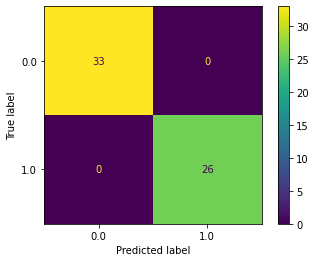

In [18]:
# Luminal vs Basal Separation
svc_mod = SVC(kernel="linear", C=100)
svc_mod.fit(lb_data_mod, lb_labels_mod)
plot_confusion_matrix(svc_mod, lb_data_mod, lb_labels_mod)

In [19]:
H_LB_MOD = - svc_mod.intercept_[0]/linalg.norm(svc_mod.coef_[0])
hyperplane_normal_lb_mod = svc_mod.coef_[0]/linalg.norm(svc_mod.coef_[0])
state_vec_lb_mod = (basal_centroid_mod - luminal_centroid_mod)/linalg.norm(luminal_centroid_mod - basal_centroid_mod)

angle_train = degrees(np.arccos(np.dot(hyperplane_normal_lb_mod,state_vec_lb_mod)))
print(angle_train)

norm_stv_df_mod = pd.DataFrame(state_vec_lb_mod,index=lb_data_mod.columns,columns=['STV_LB_mod'])
norm_stv_df_mod.insert(0,'Norm_LB_mod', hyperplane_normal_lb_mod)

norm_stv_df_mod.sort_values(by='Norm_LB_mod').to_csv('STV_Luminal_Basal_mod.csv')

display(norm_stv_df_mod.sort_values(by='Norm_LB_mod'))
np.dot(norm_stv_df_mod['Norm_LB_mod'],norm_stv_df_mod['STV_LB_mod'])

59.48632295103473


,Norm_LB_mod,STV_LB_mod
p.BTK,-0.458313,-0.018266
p.MAP2K3,-0.317025,0.033423
p.MEK,-0.209155,-0.049488
p.MAPKAPK2,-0.177677,0.031040
p.H3,-0.158261,-0.048419
p.PDPK1,-0.140398,0.019213
p.AMPK,-0.128401,0.166783
p.RB,-0.108695,-0.263914
p.SRC,-0.089109,0.187587
p.S6K,-0.061564,0.036270


0.507744027595852

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


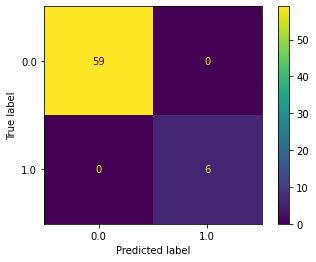

In [20]:
# Cancer vs Non-cancer
svc_canc_mod = SVC(kernel="linear", C=100)
svc_canc_mod.fit(canc_data_mod, canc_labels_mod)
plot_confusion_matrix(svc_canc_mod, canc_data_mod, canc_labels_mod)

canc_centroid_mod = (basal_centroid_mod + luminal_centroid_mod)/2.0

H_CANC_MOD = - svc_canc_mod.intercept_[0]/linalg.norm(svc_canc_mod.coef_[0])
hyperplane_normal_canc_mod = svc_canc_mod.coef_[0]/linalg.norm(svc_canc_mod.coef_[0])
state_vec_canc_mod = (canc_centroid_mod - normal_centroid_mod)/linalg.norm(canc_centroid_mod - normal_centroid_mod)

In [21]:

composite_vec_mod = pd.DataFrame(np.array([hyperplane_normal_canc_mod , np.array(state_vec_canc_mod),hyperplane_normal_lb_mod,np.array(state_vec_lb_mod)]),columns=luminal_mod.T.index,index=['Norm_Canc_mod','Canc_STV_mod','Norm_LB_mod','LB_STV_mod']).T
composite_vec_mod.to_csv('STV_2D_mod.csv')
composite_vec_mod

,Norm_Canc_mod,Canc_STV_mod,Norm_LB_mod,LB_STV_mod
b.CATENIN,-0.108872,-0.011790,0.027845,0.007019
cleavedCas,0.295838,-0.391881,0.052174,-0.001671
CyclinB,0.146746,-0.294315,0.058676,0.270111
GAPDH,-0.245648,0.003462,0.150909,0.110764
IdU,-0.013403,-0.117622,0.168409,0.286753
Ki.67,0.102995,-0.185873,0.257315,0.361176
p.4EBP1,-0.021732,0.081354,0.020771,-0.059559
p.AKT.Thr308.,0.132707,-0.094676,0.078733,-0.011751
p.AMPK,0.126065,-0.133643,-0.128401,0.166783
p.BTK,-0.290412,-0.013856,-0.458313,-0.018266


In [22]:
mod_full_df = df.drop(output_lst, axis=1).drop(["Specific DPD", "Group"], axis=1)

composite_dpd_mod = pd.DataFrame(np.zeros((len(mod_full_df.T.columns),2)),index=mod_full_df.T.columns,columns=['DPD_Canc_mod','DPD_LB_mod'])
composite_dpd_mod["DPD_LB_mod"] = mod_full_df.apply(calculate_dpd, args=(mod_full_df, H_LB_MOD, composite_vec_mod["LB_STV_mod"], composite_vec_mod["Norm_LB_mod"]), axis=1)
composite_dpd_mod["DPD_Canc_mod"] = mod_full_df.apply(calculate_dpd, args=(mod_full_df, H_CANC_MOD, composite_vec_mod["Canc_STV_mod"], composite_vec_mod["Norm_Canc_mod"]), axis=1)

composite_dpd_mod

# for smpl in mod_full_df.T.columns:
#     DPDs_2D_mod_nfull.at[smpl,'DPD_canc'] = - (b_coeff_canc_mod - np.dot(mod_full_df.T.loc[:,smpl].fillna(0),norm_vec_2D_df_mod['norm_vec_canc']))/np.dot(norm_vec_2D_df_mod['norm_vec_canc'],norm_vec_2D_df_mod['s_vec_canc'])
#     DPDs_2D_mod_nfull.at[smpl,'DPD_LB'] = - (b_coeff_LB_mod - np.dot(mod_full_df.T.loc[:,smpl].fillna(0),norm_vec_2D_df_mod['norm_vec_LB']))/np.dot(norm_vec_2D_df_mod['norm_vec_LB'],norm_vec_2D_df_mod['s_vec_LB'])
        

composite_dpd_mod_full = composite_dpd_mod.filter(regex="_full", axis=0)
composite_dpd_mod_full["cell_line_full"] = composite_dpd_mod_full.apply(lambda row: row.name[0:row.name.find("_")], axis=1)
composite_dpd_mod_full = composite_dpd_mod_full.set_index("cell_line_full")
composite_dpd_mod_full

/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_1928/314020721.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  composite_dpd_mod_full["cell_line_full"] = composite_dpd_mod_full.apply(lambda row: row.name[0:row.name.find("_")], axis=1)


,DPD_Canc_mod,DPD_LB_mod
cell_line_full,,
184A1,-0.927747,0.202297
184B5,-0.596069,-1.144917
AU565,2.116510,-1.340539
BT20,1.236303,0.377316
BT474,1.056318,-0.692588
...,...,...
UACC812,1.284361,-0.943405
UACC893,4.120455,-2.099509
ZR751,2.977401,-0.362626


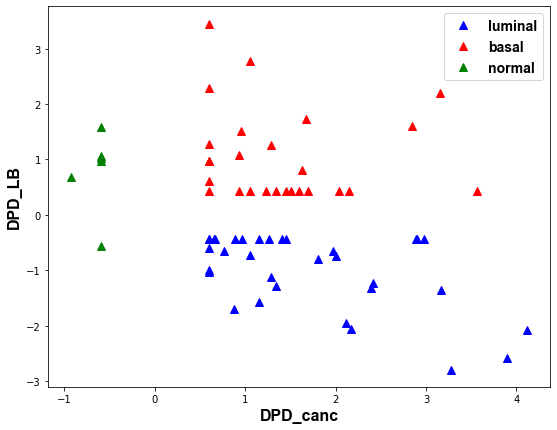

In [23]:
# now let's see what we have
# 2D visualization for multi svm

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

luminal_mod_with_col = mod_df.loc[mod_df["cell_line"].isin(luminal_cell_names)]
luminal_mod_with_col = luminal_mod_with_col.set_index("cell_line").drop(["treatment", "time"], axis=1).T

basal_mod_with_col =  mod_df.loc[mod_df["cell_line"].isin(basal_cell_names)]
basal_mod_with_col = basal_mod_with_col.set_index("cell_line").drop(["treatment", "time"], axis=1).T

normal_mod_with_col = mod_df.loc[mod_df["cell_line"].isin(normal_cell_names)]
normal_mod_with_col = normal_mod_with_col.set_index("cell_line").drop(["treatment", "time"], axis=1).T


fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
plt.rc('font', **fontAxes)


ax.plot(composite_dpd_mod_full.loc[luminal_mod_with_col.columns].iloc[:,0],composite_dpd_full.loc[luminal_mod_with_col.columns].iloc[:,1],'^',color='blue',label='luminal',ms=8)
ax.plot(composite_dpd_mod_full.loc[basal_mod_with_col.columns].iloc[:,0],composite_dpd_full.loc[basal_mod_with_col.columns].iloc[:,1],'^',color='red',label='basal',ms=8)
ax.plot(composite_dpd_mod_full.loc[normal_mod_with_col.columns].iloc[:,0],composite_dpd_full.loc[normal_mod_with_col.columns].iloc[:,1],'^',color='green',label='normal',ms=8)

ax.set_xlabel('DPD_canc',**fontLabel)
ax.set_ylabel('DPD_LB',**fontLabel)

# composite_dpd_mod.loc[luminal_mod_with_col.columns]

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.show()


In [54]:
# NUM_PERTS = 5
# perts_lst = [[m_+"_"+str(i) for i in range(NUM_PERTS)] for m_ in modules_df["Perturbation"]]
# perts_lst_updated = []
# for p in perts_lst:
#     for q in p:
#         perts_lst_updated.append(q)
# perts_lst = perts_lst_updated

perts_lst = modules_df["Perturbation"]
def create_resp_mat(line,time):   
    matrix = pd.DataFrame(index=list(modules_df.index) + ["DPD_LB", "DPD_Canc"], columns=perts_lst)
    for module in modules_df.index:
        for pert in perts_lst:
            try:
                output = modules_df["Output"].loc[module]
                # output = "p.Akt.Ser473." if output == "p.Akt.Ser473" else output
                x_1_df = df_copy[(df_copy.cell_line == line) & (df_copy.time == time) & (df_copy.treatment == pert)]
                x_0_df =  df_copy[(df_copy.cell_line == line) & (df_copy.time == time) & (df_copy.treatment == "EGF")]
                x_0 = x_0_df[output].iloc[0]
                x_1 = x_1_df[output].iloc[0]
                rij = 2*(x_1 - x_0) / (x_1+x_0)
                matrix.at[module, pert] = rij
            except:
                matrix.at[module, pert] = 0
    
    for dpd_module in ["DPD_LB", "DPD_Canc"]:
        for pert in perts_lst:
            try:
                line_comb_x1 = f"{line}_{time}_{pert}"
                line_comb_x0 = f"{line}_{time}_EGF"
                # print(line_comb)
                x_1 = composite_dpd_mod.loc[line_comb_x1].loc[dpd_module+"_mod"]
                x_0 = composite_dpd_mod.loc[line_comb_x0].loc[dpd_module+"_mod"]
                val = (x_1 - x_0) / max(np.abs(x_1), np.abs(x_0))
                matrix.at[dpd_module, pert] = val
                # print(x_1_df)
            # x_1_df = DPDs_2D_mod_nfull
            except:
                matrix.at[dpd_module, pert] = 0

    return matrix

# create_resp_mat("MDAMB157",0.0)
# df_copy

In [55]:
import os
import os
cwd = os.getcwd()
# os.mkdir("RAW")
# os.mkdir("RAW")
def create_global_mat():
    timestamps = [7.0,9.0,13.0,17.0,40.0,60.0]
    cell_lines_all = list(df_copy.cell_line.unique())
    global_mat = pd.DataFrame(index=cell_lines_all, columns=timestamps)
    for line in cell_lines_all:
        for t in timestamps:
            local_resp_mat = create_resp_mat(line,t)
            local_resp_mat.to_csv(f"/Users/atamb/Documents/compbio/RAW/{line}_{t}.csv")
            global_mat.at[line,t] =local_resp_mat 

    return global_mat

print(cwd)


/Users/atamb/Documents/compbio


In [56]:
global_resp_matrix = create_global_mat()

In [58]:
global_resp_matrix.at["184A1", 40.0]

Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.100043,0.081719,-0.005087,0.190664
PI3K_AKT,0.060998,-0.075463,0.073029,0.162519
MEK_ERK,0.064712,-0.013469,-0.070297,0.201141
PKC,0.139489,0.021925,0.178586,0.07017
DPD_LB,-0.284682,0.296667,1.251838,0.810698
DPD_Canc,-0.964626,1.226046,-0.969021,-0.965398


In [59]:
global_resp_matrix.to_csv("responses.csv")